## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.
Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire



This a classification problem but we are going to learn regression with its help,   
We will use 'FWI' as our dependent feature and all others as independent and then predict that FWI (since its the most correlated feature to classes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Read data

In [2]:
raw_data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
raw_data.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [3]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Handle missing values

In [4]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
data.drop([122,167],axis=0,inplace=True)

In [6]:
data.reset_index(drop=True,inplace=True) #drop=True to prevent previous index to become column

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


We had Bejaia and Sidi Bel-abbes regions, lets make them a feature 

In [8]:
data.loc[:122,'region']=0
data.loc[122:,'region']=1

### Fix the column names 
(Remove the spaces)

In [9]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [10]:
data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

### Fix the dtype
day,month,year,region are supposed to be integer and all others are float

In [11]:
# data[['day','month','year','region']] = data[['day','month','year','region']].astype(int)

# This is giving error for some reason

In [12]:
data[data['day']=='day']

# This is the reason!!

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [13]:
data.drop([122],axis=0,inplace=True)

In [14]:
for i in data.columns:
    if i!='Classes':
        data[i]=data[i].astype(float)

In [15]:
data[['day','month','year','region']] = data[['day','month','year','region']].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 30.4+ KB


### Fix the target variable

In [17]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [18]:
data['Classes']=data['Classes'].map(lambda i:i.lower().strip())
data['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [19]:
data['Classes'] = np.where(data['Classes'].str.contains('not fire'),0,1)
#syntax = np.where(condition,value-if-true,value-if-false)

In [20]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

This is the prepared data, lets save it!

In [21]:
data.to_csv('Algerian_forest_fires_dataset_cleaned.csv',index=False)

## EDA

In [22]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


In [23]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


<Axes: xlabel='month', ylabel='count'>

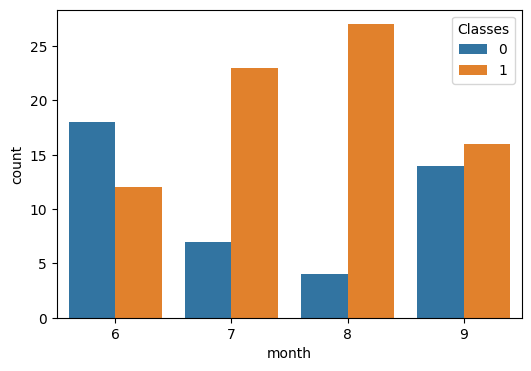

In [24]:
## How does fire depends on months
#For region 1 (Sidi-Bel Abbes)

region1_df = data[data['region']==1]
plt.figure(figsize=(6,4))
sns.countplot(region1_df,x='month',hue='Classes')

<Axes: xlabel='month', ylabel='count'>

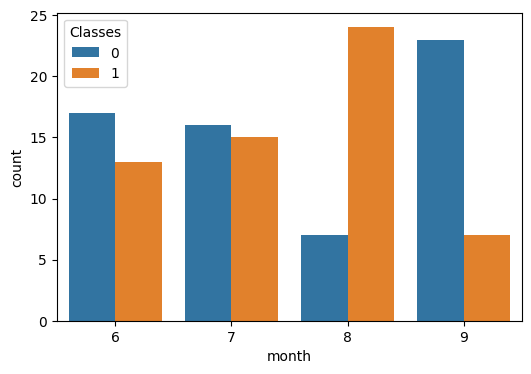

In [25]:
#For region 0 (Bejaija)

region0_df = data[data['region']==0]
plt.figure(figsize=(6,4))
sns.countplot(region0_df,x='month',hue='Classes')

- There are most fire cases in August for both regions
- there are less number of fires in bejaija

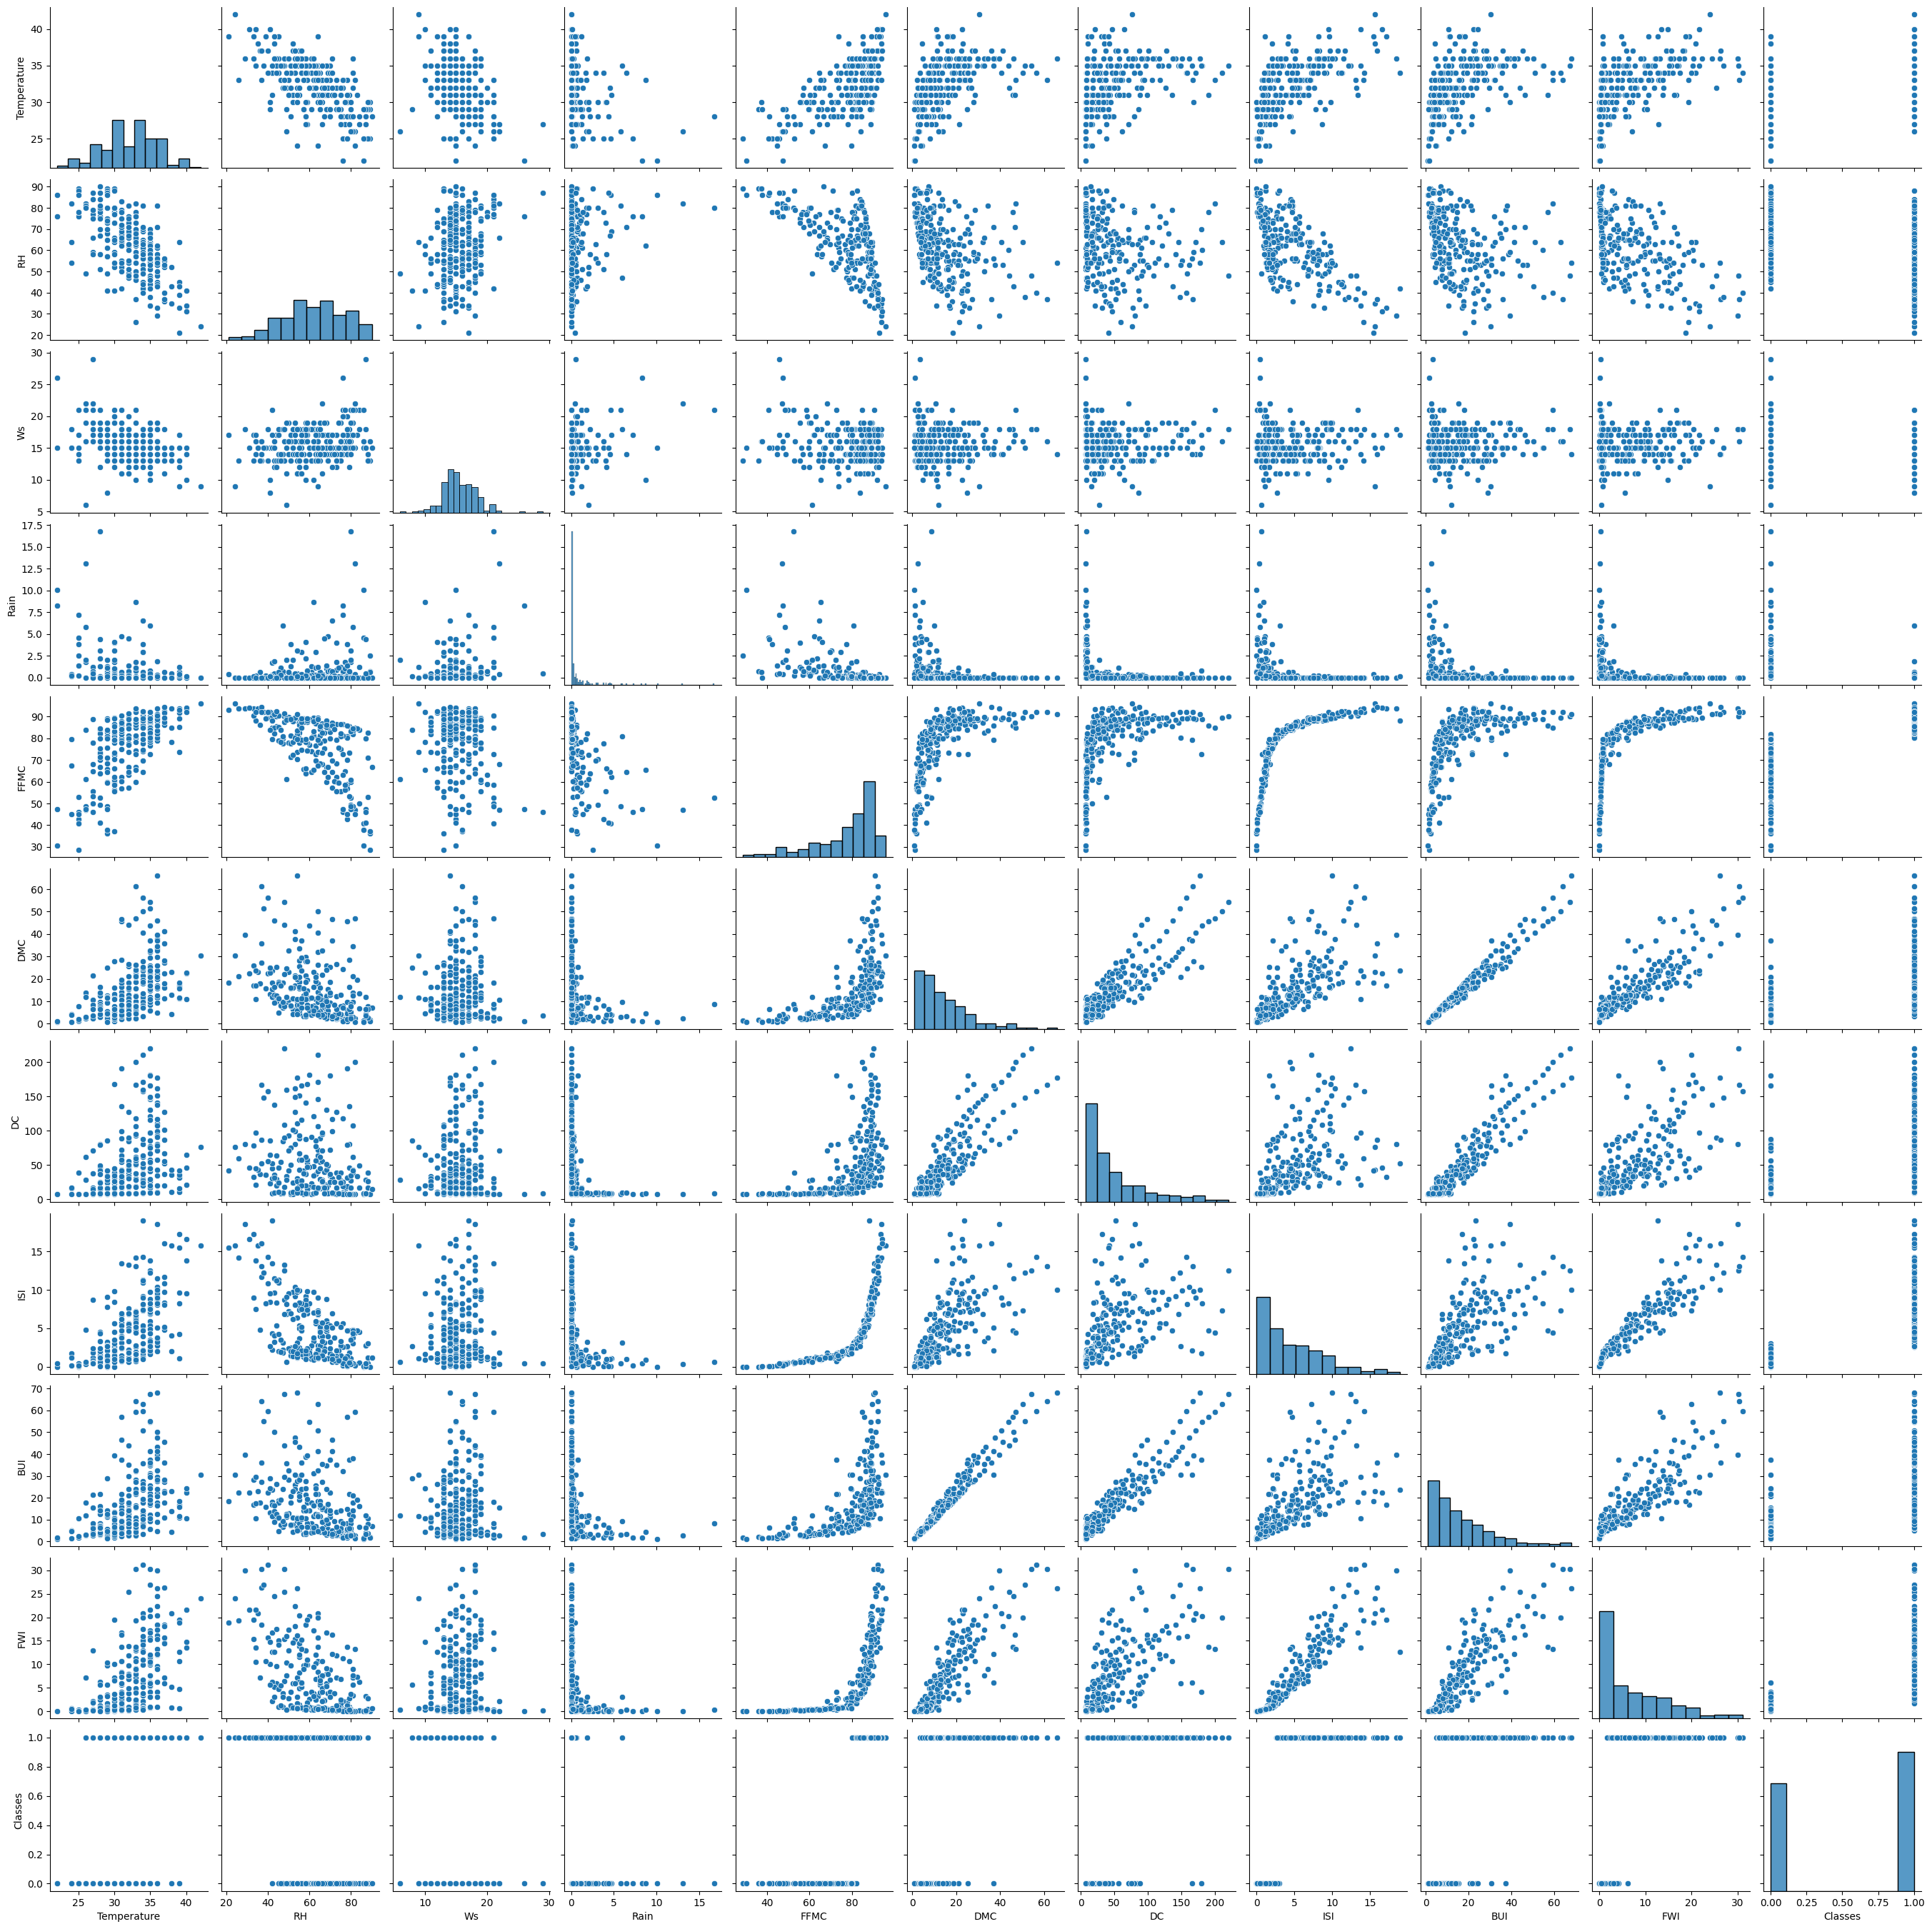

In [26]:
sns.pairplot(data.drop(['day','month','year','region'],axis=1))

### Feature engineering

In [27]:
# The day, month, year are not so good of features in prediction so we remove them

In [28]:
data_copy = data.drop(['day','month','year'],axis=1)

In [29]:
data_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## Model Training

In [30]:
## Independent and dependent features
X = data_copy.drop('FWI',axis=1)
y = data_copy['FWI']

### Check multicollinearity

In [ ]:
def high_correlation(dataset,thresold):
    high_corr_features = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thresold:
                high_corr_features.add(corr_matrix.columns[i])
    return high_corr_features

high_corr_features = high_correlation(X,0.85)
print(high_corr_features)

#This given function will find features that have high correlation with atleast one other feature
#We need domain expertise to know which one to drop 
#I am dropping both

X.drop(high_corr_features,axis=1,inplace=True)

{'DC', 'BUI'}


In [72]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
0,29.0,57.0,18.0,0.0,65.7,3.4,1.3,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,1.0,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,0.3,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,0.0,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,1.2,0,0


In [77]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 243, dtype: float64

In [79]:
X.to_csv('Algerian_forest_fires_dataset_FINAL.csv',index=False)

In [58]:
## Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42,shuffle=True)

In [59]:
## Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

<Axes: title={'center': 'With scaling'}>

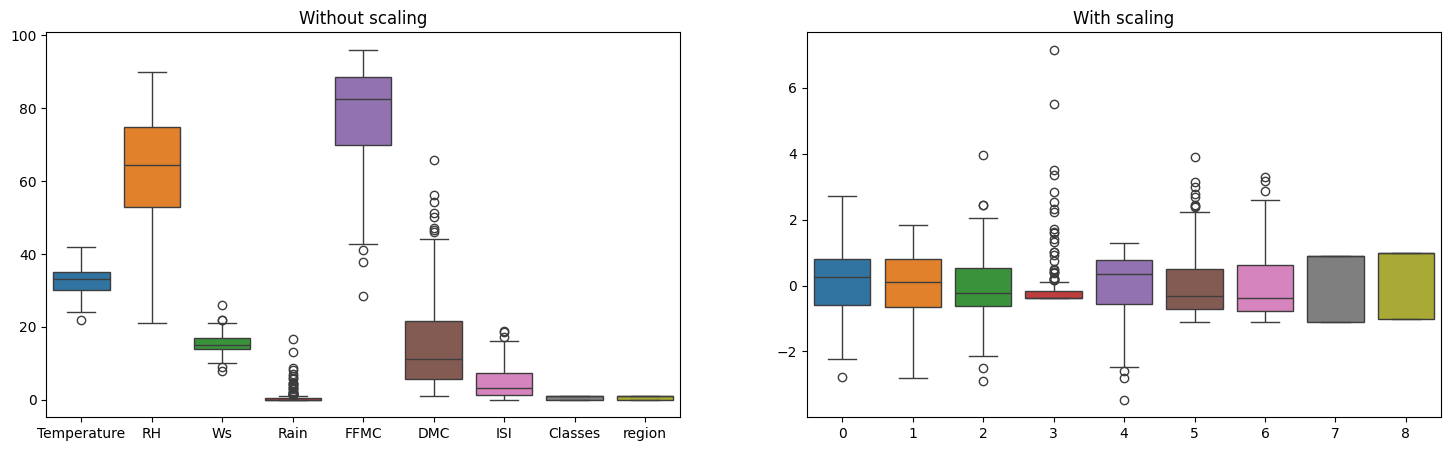

In [60]:
## Showing scaling by box plot
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Without scaling")
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
plt.title("With scaling")
sns.boxplot(data=x_train_scaled)

0.8239597813678308
0.9845563190792226


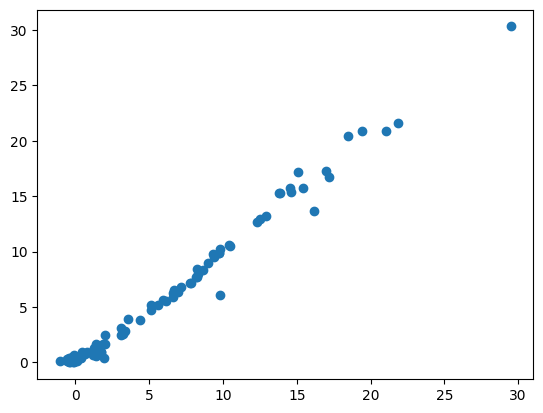

In [119]:
## Linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(x_train_scaled,y_train)
y_pred = linear_reg.predict(x_test_scaled)
rsme_error = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(rsme_error)
print(r2)
plt.scatter(y_pred,y_test)

1.4615143811159939
0.9514102148198663


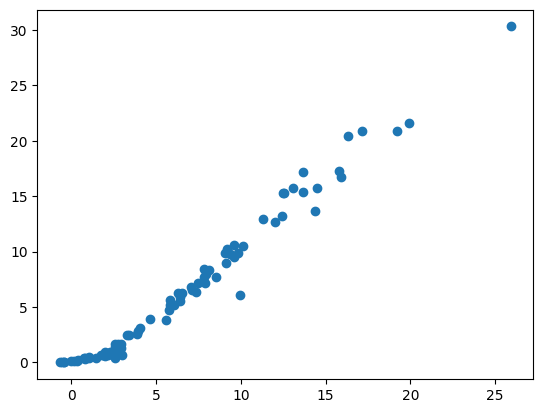

In [120]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(x_train_scaled,y_train)
y_pred = lasso_reg.predict(x_test_scaled)
rsme_error = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(rsme_error)
print(r2)
plt.scatter(y_pred,y_test)

0.848316236174791
0.983629786213086


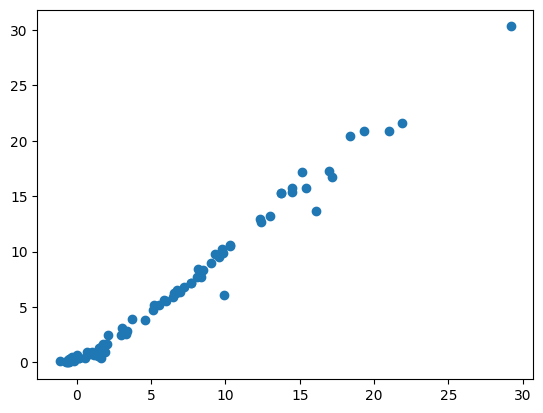

In [121]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(x_train_scaled,y_train)
y_pred = lasso_cv.predict(x_test_scaled)
rsme_error = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(rsme_error)
print(r2)
plt.scatter(y_pred,y_test)

0.839808328866117
0.9839564989246832


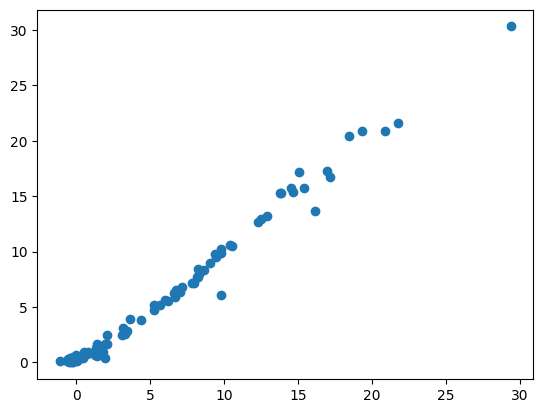

In [122]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
rsme_error = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(rsme_error)
print(r2)
plt.scatter(y_pred,y_test)

0.9216735782534518
0.9806761762294863


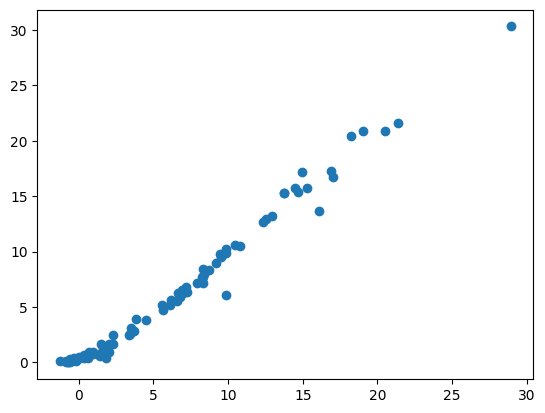

In [123]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(5)
ridge_cv.fit(x_train_scaled,y_train)
y_pred = ridge_cv.predict(x_test_scaled)
rsme_error = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(rsme_error)
print(r2)
plt.scatter(y_pred,y_test)

2.272321120850437
0.8825431896054333


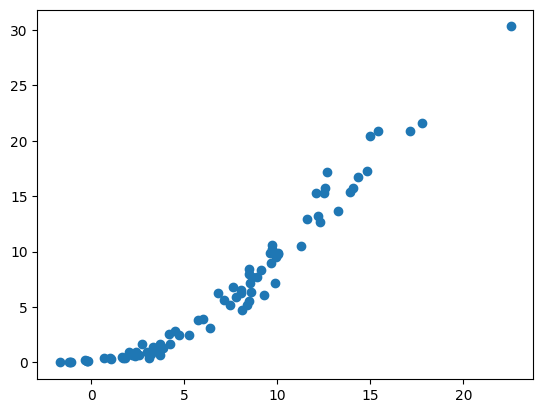

In [124]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(x_train_scaled,y_train)
y_pred = elastic_net.predict(x_test_scaled)
rsme_error = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(rsme_error)
print(r2)
plt.scatter(y_pred,y_test)

0.8654088989982667
0.9829634557249401


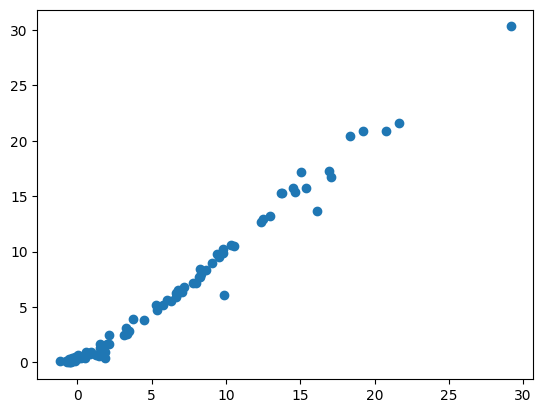

In [125]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(cv=5)
elastic_cv.fit(x_train_scaled,y_train)
y_pred = elastic_cv.predict(x_test_scaled)
rsme_error = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(rsme_error)
print(r2)
plt.scatter(y_pred,y_test)

### Machine learning cycle

Data collection -> EDA -> Feature Engineering -> Feature Selection -> Model Selection -> Hyperparameter tuning -> Web App -> Deployment

### Save model as .pkl file

In [127]:
import pickle

# The ridge regression is doing best work
pickle.dump(scaler,open('Standard_scaler.pkl','wb'))    # wb = write byte mode (file will be written in binary not text)
pickle.dump(ridge,open('ridge.pkl','wb'))

In [128]:
x_test.iloc[:5,]

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
24,31.0,64.0,15.0,0.0,86.7,14.2,5.7,1,0
6,33.0,54.0,13.0,0.0,88.2,9.9,6.4,1,0
153,28.0,58.0,18.0,2.2,63.7,3.2,1.2,0,1
233,34.0,58.0,13.0,0.2,79.5,18.7,2.1,0,1
239,30.0,65.0,14.0,0.0,85.4,16.0,4.5,1,1


In [129]:
y_test[:5]

24     8.4
6      7.2
153    0.5
233    3.8
239    6.5
Name: FWI, dtype: float64

In [130]:
test_sample = x_test.iloc[:5,]
y_test_sample_pred = ridge.predict(test_sample)
print("y_True:\n",y_test.iloc[:5,], "\n","y_predict: \n", y_test_sample_pred)
test_sample

y_True:
 24     8.4
6      7.2
153    0.5
233    3.8
239    6.5
Name: FWI, dtype: float64 
 y_predict: 
 [  7.88597233  -3.89788597 -37.64249583  13.8492613    9.43511361]


c:\Users\Arun\Documents\Documents\Machine_Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
24,31.0,64.0,15.0,0.0,86.7,14.2,5.7,1,0
6,33.0,54.0,13.0,0.0,88.2,9.9,6.4,1,0
153,28.0,58.0,18.0,2.2,63.7,3.2,1.2,0,1
233,34.0,58.0,13.0,0.2,79.5,18.7,2.1,0,1
239,30.0,65.0,14.0,0.0,85.4,16.0,4.5,1,1


In [99]:
## This file will be used in flask to get correct order of features
import json

# Assuming X is your training dataframe
feature_order = list(X.columns)

with open("feature_order.json", "w") as f:
    json.dump(feature_order, f)
